In [49]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers import Activation,Dense
from keras.layers.core import Dense,Flatten
from keras.preprocessing.image import *
from keras.layers import *
from IPython.display import display 
from PIL import Image
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from keras.callbacks import CSVLogger
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
train_path = ("C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data")
test_path = ("C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\test_data")

In [51]:
train_batches =ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['batik-bali',
 'batik-betawi',
 'batik-celup',
 'batik-cendrawasih',
 'batik-ceplok',
 'batik-ciamis',
 'batik-garutan',
 'batik-gentongan',
 'batik-kawung',
 'batik-keraton',
 'batik-lasem',
 'batik-megamendung',
 'batik-parang',
 'batik-pekalongan',
 'batik-priangan',
 'batik-sekar',
 'batik-sidoluhur',
 'batik-sidomukti',
 'batik-sogan',
 'batik-tambal'], 
batch_size=32)
test_batches =ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['batik-bali',
 'batik-betawi',
 'batik-celup',
 'batik-cendrawasih',
 'batik-ceplok',
 'batik-ciamis',
 'batik-garutan',
 'batik-gentongan',
 'batik-kawung',
 'batik-keraton',
 'batik-lasem',
 'batik-megamendung',
 'batik-parang',
 'batik-pekalongan',
 'batik-priangan',
 'batik-sekar',
 'batik-sidoluhur',
 'batik-sidomukti',
 'batik-sogan',
 'batik-tambal'], batch_size=32)

Found 4000 images belonging to 20 classes.
Found 491 images belonging to 20 classes.


In [52]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

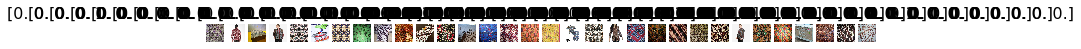

In [53]:
imgs,labels=next(test_batches) #grab a batch
plots(imgs,titles=labels)

In [54]:
vgg16_model=keras.applications.vgg16.VGG16()

In [55]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [56]:
#CONVERTING THIS MODEL TO SEQUENTIAL
model=Sequential()
for layer in vgg16_model.layers[:-1]: #not copying the last layer
    model.add(layer)

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [58]:
for layer in model.layers:
    layer.trainable=False

In [59]:
model.add(Dense(20,activation='softmax'))
#UPDATE LAST LAYER CONTAINING 1000 CLASSES INTO 2

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')==0.800):
      print('Akurasi mencapai 100%, proses training dihentikan!')
      self.model.stop_training = True

callbacks = myCallback()

In [41]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

opt = RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,)

model.compile(
    optimizer = opt,
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)


In [18]:

from tensorflow.keras.optimizers import Adam

opt = RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,)

model.compile(
    optimizer = opt,
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)



history = model.fit(
    train_batches,
    epochs = 10,
    steps_per_epoch=125,
    validation_data = train_batches,
    validation_steps = 3,
    shuffle=True
)

Epoch 1/10
125/125 [==============================] - 2647s 21s/step - loss: 0.1729 - accuracy: 0.4155 - val_loss: 0.0739 - val_accuracy: 0.7396
Epoch 2/10
125/125 [==============================] - 2620s 21s/step - loss: 0.0886 - accuracy: 0.6647 - val_loss: 0.0531 - val_accuracy: 0.7708
Epoch 3/10
125/125 [==============================] - 2646s 21s/step - loss: 0.0600 - accuracy: 0.7763 - val_loss: 0.0446 - val_accuracy: 0.8333
Epoch 4/10
125/125 [==============================] - 2614s 21s/step - loss: 0.0442 - accuracy: 0.8390 - val_loss: 0.0334 - val_accuracy: 0.8542
Epoch 5/10
125/125 [==============================] - 2690s 22s/step - loss: 0.0360 - accuracy: 0.8662 - val_loss: 0.0355 - val_accuracy: 0.8750
Epoch 6/10
125/125 [==============================] - 3030s 24s/step - loss: 0.0284 - accuracy: 0.9022 - val_loss: 0.0187 - val_accuracy: 0.9167
Epoch 7/10
125/125 [==============================] - 2704s 22s/step - loss: 0.0224 - accuracy: 0.9235 - val_loss: 0.0151 - val_ac

In [19]:
model.save_weights("C:\\Users\\angelina\\Desktop\\BangkitProject//v1_4.1_E50.h5")

In [61]:
model.load_weights("C:\\Users\\angelina\\Desktop\\BangkitProject//v1_4.1_E50.h5")

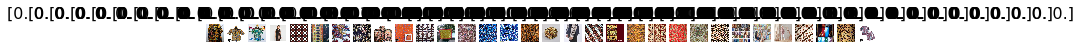

In [62]:
test_imgs,test_labels=next(test_batches)
plots(test_imgs,titles=test_labels)

In [20]:
test_labels=test_labels[:,0]
test_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [63]:
prediction=model.predict_generator(test_batches,steps=1,verbose=0)

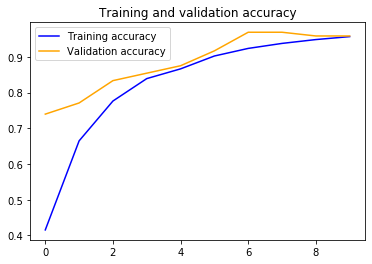

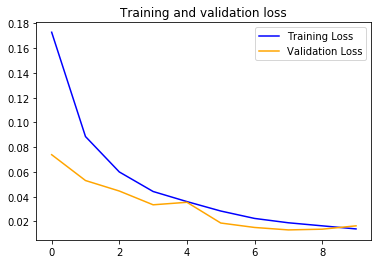

In [26]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'blue', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [64]:
def prediction(path_image):
  img = image.load_img(path_image,target_size=(224,224))
  img = np.asarray(img)


  plt.imshow(img)
  img = np.expand_dims(img, axis=0)

  model.load_weights("C:\\Users\\angelina\\Desktop\BangkitProject\\v1_4.1_E50.h5")

  output = model.predict(img)
  if output[0][0] > output[0][1]:
    print("bali")
  elif output[0][1] > output[0][2]:
    print("betawi")
  elif output[0][2] > output[0][3]:
    print("celup")
  elif output[0][3] > output[0][4]:
    print("cendrawasih")
  elif output[0][4] > output[0][5]:
    print("ceplok")
  elif output[0][5] > output[0][6]:
    print("ceplok")
  elif output[0][6] > output[0][7]:
    print("ceplok")
  elif output[0][7] > output[0][8]:
    print("kawung")
  elif output[0][8] > output[0][9]:
    print("keraton")
  elif output[0][9] > output[0][10]:
    print("lasem")
  elif output[0][10] > output[0][11]:
    print("megamendung")
  elif output[0][11] > output[0][12]:
    print("parang")
  elif output[0][12] > output[0][13]:
    print("pekalongan")
  elif output[0][13] > output[0][14]:
    print("priangan")
  elif output[0][14] > output[0][15]:
    print("sekar")
  elif output[0][15] > output[0][16]:
    print("sidoluhur")
  elif output[0][16] > output[0][17]:
    print("sidomukti")
  elif output[0][17] > output[0][18]:
    print("sogan")
  elif output[0][18] > output[0][19]:
    print("tambal")








    




bali


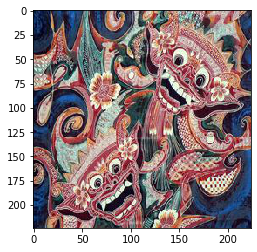

In [70]:
prediction("C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\test_data\\batik-bali//0.jpg")